<a href="https://colab.research.google.com/github/chuksdata/Police-project/blob/master/dur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
dur = pd.read_csv('nc_durham_2019_02_25.csv')

Explorring the first 5 rows of the data frame

In [19]:
dur.head()

,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop
0,1219541,2001-12-28,NaN,"Durham, Durham County",Durham County,22.0,black,female,5b9908c1a5,Durham Police Department,vehicular,False,False,True,warning,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,Investigation
1,1221117,2002-01-02,04:00:00,"Durham, Durham County",Durham County,28.0,hispanic,male,0c140e68b5,Durham Police Department,vehicular,False,True,False,citation,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,Stop Light/Sign Violation
2,1221124,2002-01-02,NaN,"Durham, Durham County",Durham County,21.0,black,male,0c140e68b5,Durham Police Department,vehicular,False,False,True,warning,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,Vehicle Equipment Violation
3,1221133,2002-01-02,19:50:00,"Durham, Durham County",Durham County,28.0,black,female,41b05be9b1,Durham Police Department,vehicular,False,True,False,citation,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,Vehicle Regulatory Violation
4,1221146,2002-01-02,20:45:00,"Durham, Durham County",Durham County,36.0,black,female,41b05be9b1,Durham Police Department,vehicular,False,False,True,warning,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,Vehicle Regulatory Violation


In [11]:
dur.tail()

,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop
326019,20266702,2015-12-03,21:10:00,"nan, Durham County",Durham County,23.0,black,male,72b606b024,Durham Police Department,vehicular,False,True,False,citation,False,False,False,False,True,False,False,consent,NaN,Other Official Information,Stop Light/Sign Violation
326020,20266703,2015-12-04,03:20:00,"nan, Durham County",Durham County,32.0,asian/pacific islander,female,a4d178e9f0,Durham Police Department,vehicular,False,False,False,NaN,False,False,False,False,True,True,True,probable cause,NaN,Observation of Suspected Contraband,Investigation
326021,20280195,2015-01-28,10:17:00,"Durham, Durham County",Durham County,31.0,black,male,6c39e1a069,Durham County Sheriff's Office,vehicular,False,False,True,warning,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,Speed Limit Violation
326022,20280197,2015-01-28,13:41:00,"Durham, Durham County",Durham County,21.0,black,female,6c39e1a069,Durham County Sheriff's Office,vehicular,False,False,True,warning,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,Speed Limit Violation
326023,20280228,2013-11-01,04:23:00,"Durham, Durham County",Durham County,32.0,black,female,0fbc3d0948,Durham County Sheriff's Office,vehicular,False,False,True,warning,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,Speed Limit Violation


In [27]:
dur.shape

(326024, 26)

In [28]:
dur.columns

Index(['raw_row_number', 'date', 'time', 'location', 'county_name',
       'subject_age', 'subject_race', 'subject_sex', 'officer_id_hash',
       'department_name', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'frisk_performed', 'search_conducted',
       'search_person', 'search_vehicle', 'search_basis', 'reason_for_frisk',
       'reason_for_search', 'reason_for_stop'],
      dtype='object')

In [30]:
dur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326024 entries, 0 to 326023
Data columns (total 26 columns):
raw_row_number        326024 non-null int64
date                  326024 non-null object
time                  277785 non-null object
location              326024 non-null object
county_name           326024 non-null object
subject_age           326017 non-null float64
subject_race          326023 non-null object
subject_sex           326023 non-null object
officer_id_hash       326024 non-null object
department_name       326024 non-null object
type                  326024 non-null object
arrest_made           326024 non-null bool
citation_issued       326024 non-null bool
warning_issued        326024 non-null bool
outcome               315242 non-null object
contraband_found      21706 non-null object
contraband_drugs      21706 non-null object
contraband_weapons    21706 non-null object
frisk_performed       21706 non-null object
search_conducted      326024 non-null bool
s

In [45]:
durmini = dur[['subject_sex','subject_age','subject_race','reason_for_stop']]

durmini.head()

,subject_sex,subject_age,subject_race,reason_for_stop
0,female,22.0,black,Investigation
1,male,28.0,hispanic,Stop Light/Sign Violation
2,male,21.0,black,Vehicle Equipment Violation
3,female,28.0,black,Vehicle Regulatory Violation
4,female,36.0,black,Vehicle Regulatory Violation


**This is to check for percentage of stops per subject race.**

In [76]:
durmini.subject_race.value_counts(normalize = True)*100

black                     55.471853
white                     29.879794
hispanic                  11.952531
asian/pacific islander     1.513697
other/unknown              1.182125
Name: subject_race, dtype: float64

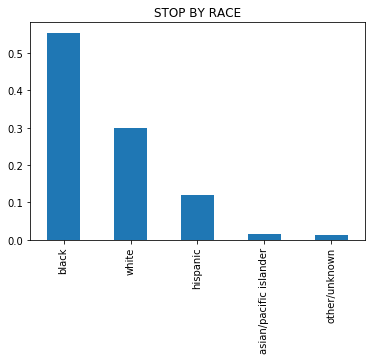

In [79]:
durmini.subject_race.value_counts(normalize = True).plot(kind='bar',title = 'STOP BY RACE')

From our data we can notice that blacks were stopped for 55% of the time. 



**what reason were black people stopped this much?**

In [52]:
Black = durmini[durmini.subject_race == 'black']
Black.head()

,subject_sex,subject_age,subject_race,reason_for_stop
0,female,22.0,black,Investigation
2,male,21.0,black,Vehicle Equipment Violation
3,female,28.0,black,Vehicle Regulatory Violation
4,female,36.0,black,Vehicle Regulatory Violation
5,female,68.0,black,Seat Belt Violation


In [78]:
Black.reason_for_stop.value_counts(normalize = True)*100

Speed Limit Violation            28.237610
Vehicle Regulatory Violation     23.210267
Vehicle Equipment Violation      15.702982
Investigation                     8.159756
Safe Movement Violation           7.403332
Stop Light/Sign Violation         6.607096
Other Motor Vehicle Violation     4.973708
Seat Belt Violation               3.882201
Checkpoint                        1.443730
Driving While Impaired            0.379318
Name: reason_for_stop, dtype: float64

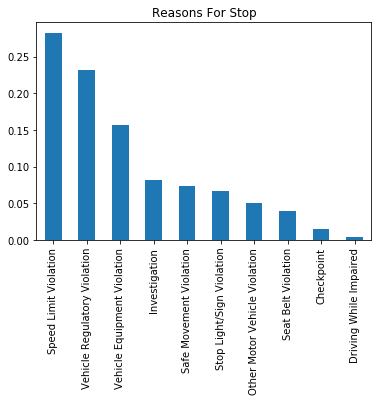

In [75]:
Black.reason_for_stop.value_counts(normalize = True).plot(kind= 'bar',title='Reasons For Stop')